In [0]:
# Import necessary PySpark libraries
from pyspark.sql.functions import col
from pyspark.ml.stat import Correlation
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from pyspark.ml.stat import ChiSquareTest
from pyspark.ml.feature import StringIndexer
from pyspark.ml.regression import LinearRegression
from pyspark.sql.functions import *
from pyspark.ml.feature import PCA, VectorAssembler
from pyspark.ml.clustering import LDA

In [0]:
# Load data into a PySpark DataFrame
data = spark.read.format("parquet").option("header", "true").load("/temp/Cleaned")

In [0]:
# checking the schema of dataframe
data.printSchema()

root
 |-- Type of Hotel: string (nullable = true)
 |-- Year: integer (nullable = true)
 |-- Month: string (nullable = true)
 |-- Reservation Date: timestamp (nullable = true)
 |-- Arrival week: integer (nullable = true)
 |-- Arrival Date: integer (nullable = true)
 |-- Weekend Stays: integer (nullable = true)
 |-- Weekday Stays: integer (nullable = true)
 |-- Meal: string (nullable = true)
 |-- Booking Payment: string (nullable = true)
 |-- Adults: integer (nullable = true)
 |-- Children: double (nullable = true)
 |-- Kids: integer (nullable = true)
 |-- Country: string (nullable = true)
 |-- Booking Type: string (nullable = true)
 |-- Repeated Guest: integer (nullable = true)
 |-- Prev Cancel: integer (nullable = true)
 |-- History: integer (nullable = true)
 |-- Reserved Room: string (nullable = true)
 |-- Assigned Room: string (nullable = true)
 |-- Booking Changes: integer (nullable = true)
 |-- Waiting List: integer (nullable = true)
 |-- Customer: string (nullable = true)
 |-- Pe

In [0]:
# Calculting the Null values in Dataframe
data.toPandas().isnull().sum().sum()

Out[49]: 0

<h4> Identifying The count of maximum hotels booked  According to type of Hotel </h4>

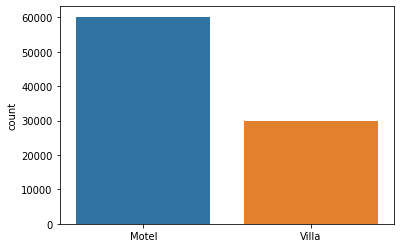

In [0]:
sns.countplot(x=data.toPandas()["Type of Hotel"]).set(xlabel=None);

<h4> Analysing the count of guests per month for "Villa" And "Motel" Type of Hotel</h4>

In [0]:
data.groupBy("Type of Hotel", "Month").agg(count("*").alias("Number of Guest")).sort('Number of Guest').display()

Type of Hotel Month Number of Guest Villa January 1678 Villa November 1732 Villa December 1917 Villa February 2193 Villa September 2211 Villa June 2376 Villa March 2542 Villa October 2599 Villa April 2752 Villa May 2792 Motel January 2928 Motel November 2976 Motel December 3108 Villa July 3212 Motel February 3782 Villa August 3804 Motel March 4983 Motel September 5423 Motel April 5524 Motel October 5670 Motel July 6122 Motel June 6224 Motel May 6460 Motel August 6990

<h4> Analysing the count of guests per year for "Villa" And "Motel" Type of Hotel</h4>

In [0]:
data.groupBy("Type of Hotel", "Year").agg(count("*").alias("Number of Guest")).sort('Type of Hotel','Year').display()

Type of Hotel Year Number of Guest Motel 2015 10192 Motel 2016 28646 Motel 2017 21352 Villa 2015 6110 Villa 2016 13562 Villa 2017 10136

<h4> Analysing the count of different types of Reserved rooms as per each hotel type</h4>

In [0]:
data.toPandas().groupby(["Type of Hotel"])["Reserved Room"].agg(["value_counts"])

value_counts 
 
 
 Type of Hotel 
 Reserved Room 
 
 
 
 
 
 Motel 
 A 
 46957 
 
 
 D 
 9192 
 
 
 F 
 1521 
 
 
 E 
 1219 
 
 
 B 
 943 
 
 
 G 
 324 
 
 
 C 
 22 
 
 
 H 
 10 
 
 
 P 
 2 
 
 
 Villa 
 A 
 17184 
 
 
 D 
 5709 
 
 
 E 
 3725 
 
 
 G 
 1205 
 
 
 F 
 860 
 
 
 C 
 708 
 
 
 H 
 408 
 
 
 B 
 5 
 
 
 L 
 3 
 
 
 P 
 1

In [0]:
# g_h=df.groupby(["hotel"])["is_canceled"].agg(["value_counts"])  # 1 indicated cancellation and 0 indicates not cancelled
# g_h

data.groupBy(["Type of Hotel","Cancellation"]).agg({"Type of Hotel":'count',"Cancellation":'count'}).show()

+-------------+------------+-------------------+--------------------+
|Type of Hotel|Cancellation|count(Cancellation)|count(Type of Hotel)|
+-------------+------------+-------------------+--------------------+
|        Villa|           1|               8756|                8756|
|        Villa|           0|              21052|               21052|
|        Motel|           0|              35313|               35313|
|        Motel|           1|              24877|               24877|
+-------------+------------+-------------------+--------------------+



<h4>Here we are calculating the Correlation between features</h4>

In [0]:
data.toPandas().corr()

Year 
 Arrival week 
 Arrival Date 
 Weekend Stays 
 Weekday Stays 
 Adults 
 Children 
 Kids 
 Repeated Guest 
 Prev Cancel 
 History 
 Booking Changes 
 Waiting List 
 Per Day Charges 
 Parking at premises 
 Physical Challenged 
 Cancellation 
 Booking Done 
 
 
 
 
 Year 
 1.000000 
 -0.543702 
 -0.032021 
 0.017221 
 0.040936 
 0.045414 
 0.047129 
 -0.002336 
 0.008251 
 -0.149285 
 0.031524 
 0.033907 
 -0.029106 
 0.198174 
 -0.026985 
 0.103662 
 0.029867 
 0.062034 
 
 
 Arrival week 
 -0.543702 
 1.000000 
 0.086559 
 0.018390 
 0.010979 
 0.024419 
 0.015846 
 0.004599 
 -0.034615 
 0.055052 
 -0.027951 
 0.000740 
 0.015931 
 0.071319 
 0.000499 
 0.017732 
 0.005811 
 0.099924 
 
 
 Arrival Date 
 -0.032021 
 0.086559 
 1.000000 
 0.009874 
 -0.012380 
 -0.002294 
 0.013804 
 -0.000031 
 -0.009921 
 -0.012269 
 -0.000112 
 0.007169 
 -0.001655 
 0.019607 
 0.004808 
 0.006269 
 0.001665 
 0.005936 
 
 
 Weekend Stays 
 0.017221 
 0.018390 
 0.009874 
 1.000000 
 0.473052 
 0.084673 
 0.036417 
 0.027198 
 -0.070738 
 -0.026539 
 -0.041950 
 0.065316 
 -0.030225 
 0.043308 
 -0.021517 
 0.067140 
 -0.009006 
 0.067978 
 
 
 Weekday Stays 
 0.040936 
 0.010979 
 -0.012380 
 0.473052 
 1.000000 
 0.105941 
 0.040941 
 0.028187 
 -0.095736 
 -0.027901 
 -0.053503 
 0.086695 
 -0.004476 
 0.064687 
 -0.040808 
 0.055188 
 0.037180 
 0.172470 
 
 
 Adults 
 0.045414 
 0.024419 
 -0.002294 
 0.084673 
 0.105941 
 1.000000 
 0.036967 
 0.025239 
 -0.158654 
 -0.020541 
 -0.118601 
 -0.045514 
 -0.007232 
 0.268417 
 0.002031 
 0.122769 
 0.081933 
 0.131591 
 
 
 Children 
 0.047129 
 0.015846 
 0.013804 
 0.036417 
 0.040941 
 0.036967 
 1.000000 
 0.026333 
 -0.031516 
 -0.030666 
 -0.020948 
 0.059117 
 -0.025089 
 0.341459 
 0.054904 
 0.081447 
 0.001373 
 -0.034320 
 
 
 Kids 
 -0.002336 
 0.004599 
 -0.000031 
 0.027198 
 0.028187 
 0.025239 
 0.026333 
 1.000000 
 -0.011715 
 -0.010833 
 -0.008933 
 0.105647 
 -0.009401 
 0.033352 
 0.036202 
 0.113533 
 -0.036570 
 -0.018084 
 
 
 Repeated Guest 
 0.008251 
 -0.034615 
 -0.009921 
 -0.070738 
 -0.095736 
 -0.158654 
 -0.031516 
 -0.011715 
 1.000000 
 0.137528 
 0.430953 
 0.014757 
 -0.017281 
 -0.125440 
 0.071764 
 0.016153 
 -0.085172 
 -0.118752 
 
 
 Prev Cancel 
 -0.149285 
 0.055052 
 -0.012269 
 -0.026539 
 -0.027901 
 -0.020541 
 -0.030666 
 -0.010833 
 0.137528 
 1.000000 
 0.254314 
 -0.030214 
 0.010196 
 -0.077762 
 -0.018879 
 -0.055402 
 0.127068 
 0.096491 
 
 
 History 
 0.031524 
 -0.027951 
 -0.000112 
 -0.041950 
 -0.053503 
 -0.118601 
 -0.020948 
 -0.008933 
 0.430953 
 0.254314 
 1.000000 
 0.008159 
 -0.008564 
 -0.079684 
 0.047549 
 0.033224 
 -0.055341 
 -0.076728 
 
 
 Booking Changes 
 0.033907 
 0.000740 
 0.007169 
 0.065316 
 0.086695 
 -0.045514 
 0.059117 
 0.105647 
 0.014757 
 -0.030214 
 0.008159 
 1.000000 
 -0.012639 
 0.038719 
 0.052420 
 0.059205 
 -0.121800 
 -0.004517 
 
 
 Waiting List 
 -0.029106 
 0.015931 
 -0.001655 
 -0.030225 
 -0.004476 
 -0.007232 
 -0.025089 
 -0.009401 
 -0.017281 
 0.010196 
 -0.008564 
 -0.012639 
 1.000000 
 -0.034218 
 -0.024814 
 -0.064497 
 0.056815 
 0.122051 
 
 
 Per Day Charges 
 0.198174 
 0.071319 
 0.019607 
 0.043308 
 0.064687 
 0.268417 
 0.341459 
 0.033352 
 -0.125440 
 -0.077762 
 -0.079684 
 0.038719 
 -0.034218 
 1.000000 
 0.049994 
 0.183062 
 0.026636 
 -0.077764 
 
 
 Parking at premises 
 -0.026985 
 0.000499 
 0.004808 
 -0.021517 
 -0.040808 
 0.002031 
 0.054904 
 0.036202 
 0.071764 
 -0.018879 
 0.047549 
 0.052420 
 -0.024814 
 0.049994 
 1.000000 
 0.082164 
 -0.201432 
 -0.123469 
 
 
 Physical Challenged 
 0.103662 
 0.017732 
 0.006269 
 0.067140 
 0.055188 
 0.122769 
 0.081447 
 0.113533 
 0.016153 
 -0.055402 
 0.033224 
 0.059205 
 -0.064497 
 0.183062 
 0.082164 
 1.000000 
 -0.222243 
 -0.101755 
 
 
 Cancellation 
 0.029867 
 0.005811 
 0.001665 
 -0.009006 
 0.037180 
 0.081933 
 0.001373 
 -0.036570 
 -0.085172 
 0.127068 
 -0.055341 
 -0.121800 


In [0]:
# checking the Number of rows and columns in the table
data.toPandas().shape

Out[56]: (89998, 29)

In [0]:
# checking the statistical information about the dataset
data.describe().display()


summary Type of Hotel Year Month Arrival week Arrival Date Weekend Stays Weekday Stays Meal Booking Payment Adults Children Kids Country Booking Type Repeated Guest Prev Cancel History Reserved Room Assigned Room Booking Changes Waiting List Customer Per Day Charges Parking at premises Physical Challenged Reservation Status Cancellation Booking Done count 89998 89998 89998 89998 89998 89998 89998 89998 89998 89998 89998 89998 89998 89998 89998 89998 89998 89998 89998 89998 89998 89998 89998 89998 89998 89998 89998 89998 mean null 2016.1687370830464 null 27.122347163270295 16.408631302917843 0.9084535211893597 2.526956154581213 null null 1.857963510300229 0.10451343363185849 0.00966688148625525 null null 0.03130069557101269 0.05830129558434632 0.13829196204360097 null null 0.22818284850774462 1.30697348829974 null 101.74672770506011 0.06395697682170715 0.6233694082090713 null 0.37370830462899174 107.27361719149314 stddev null 0.7089042114606721 null 13.589522050590595 9.082928843588963 1.002318215640874 1.8519311041763653 null null 0.5256337595355757 0.3997141472694 0.09930980708091137 null null 0.17413012071032372 0.4309376111553231 1.4567817837041468 null null 0.6581905893145452 13.365990087827736 null 47.8536041616748 0.24526729431720082 0.8176370768652185 null 0.4837902524101637 111.19219788232901 min Motel 2015 April 1 1 0 0 All Inclusive No Deposit 0 0.0 0 AGO Aviation 0 0 0 A A 0 0 Contract 0 0 0 Canceled 0 0 max Villa 2017 September 53 31 14 35 Room Only Refundable 26 3.0 2 ZAF Website 1 26 66 P P 16 391 Transient-Party 437 2 5 No-Show 1 629

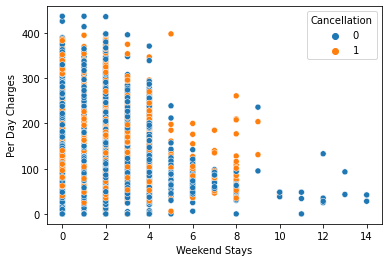

In [0]:
# Visualization using Matplotlib and Seaborn
sns.scatterplot(x="Weekend Stays", y="Per Day Charges", hue="Cancellation", data=data.toPandas())
plt.show()

<h2> Conducting Hypothesis Testing</h2>

<h4> Hypothesis testing using t-test</h4>

In [0]:
# Taking only those records from dataset where the cancellation is True
cancellation = data.filter(col("Cancellation") == 1).select("Weekend Stays", "Weekday Stays", "Per Day Charges")
cancellation.display()


Weekend Stays Weekday Stays Per Day Charges 0 2 83 2 6 79 1 2 50 1 2 81 0 3 121 2 3 91 2 5 177 0 2 62 0 2 62 0 2 120 2 2 180 2 4 119 0 4 134 0 2 150 1 2 164 2 6 107 2 4 129 4 5 127 1 3 71 1 2 55 0 1 80 1 4 100 1 3 134 0 2 135 2 2 88 1 2 67 0 2 116 0 1 36 2 2 225 0 2 62 0 1 128 0 2 62 1 3 47 2 4 98 0 5 181 0 2 115 0 3 102 0 3 95 1 3 85 0 4 105 0 1 100 0 4 79 1 4 129 2 2 123 2 1 39 0 3 96 2 1 34 0 4 120 0 3 90 0 2 40 1 1 120 1 2 119 0 2 88 0 3 135 2 3 42 0 1 77 1 1 62 1 3 90 0 2 62 0 2 62 1 2 126 1 4 95 2 5 242 0 2 160 0 5 336 0 3 117 0 2 55 0 3 86 2 1 120 1 2 72 0 2 122 0 3 68 0 3 140 1 2 105 1 3 89 1 2 90 0 2 65 2 2 95 0 1 105 2 7 90 2 2 88 2 6 116 0 1 65 2 6 67 4 7 77 2 3 57 1 2 90 1 3 149 3 9 211 2 8 88 0 1 65 1 3 101 2 2 189 1 2 177 0 0 0 2 3 89 0 2 89 0 2 169 0 1 68 0 3 85 2 3 210 1 2 139 0 2 80 0 2 62 0 2 40 0 2 62 1 3 133 0 3 119 0 2 105 2 4 92 0 2 84 2 7 278 0 2 85 0 1 67 1 2 99 2 3 160 1 2 135 1 1 62 0 1 89 3 5 38 1 3 80 2 0 90 1 0 136 0 2 62 2 8 147 2 5 70 0 2 175 2 6 90 2 6 88 0 2 119 1 2 297 0 4 151 2 3 95 2 5 54 0 1 125 2 5 154 1 1 62 0 5 92 2 0 138 2 1 154 1 2 144 0 3 78 1 1 92 2 0 96 0 2 62 2 1 89 1 1 107 0 3 85 1 2 62 2 0 74 0 2 110 0 2 62 3 7 72 1 2 48 2 9 82 2 1 80 0 1 90 2 6 139 0 2 180 2 2 303 0 1 95 0 2 177 2 1 130 0 2 75 2 2 135 2 5 72 0 3 143 1 1 105 2 5 147 0 4 73 0 2 62 2 1 130 1 2 130 0 3 62 0 1 95 1 3 96 1 3 99 2 3 123 4 6 34 1 2 130 1 0 113 4 10 51 1 3 137 0 2 80 1 0 120 0 2 90 4 10 122 2 2 30 0 4 138 2 2 130 2 0 150 0 2 101 0 3 119 0 2 62 2 3 49 2 5 63 2 5 199 2 5 129 0 5 90 2 5 130 2 5 124 2 1 62 1 4 110 2 1 90 2 6 29 0 3 79 0 2 62 0 3 89 2 3 100 2 3 108 0 3 107 1 0 156 0 4 75 2 1 101 1 4 87 0 1 67 0 4 40 0 2 65 1 2 75 0 5 167 2 2 48 0 3 126 1 5 88 0 4 168 2 5 53 2 5 117 1 2 75 2 0 201 0 1 95 1 1 57 1 1 86 0 2 111 0 0 0 0 3 90 0 3 165 0 3 89 0 3 104 3 6 222 1 1 140 0 3 40 1 5 70 1 2 91 0 2 85 1 0 180 2 3 112 2 5 89 0 2 107 2 4 91 0 2 62 0 1 75 1 1 180 0 2 139 1 1 82 1 1 96 0 2 62 2 1 73 0 2 142 0 2 119 2 0 90 0 2 72 0 2 62 2 2 71 0 5 49 2 1 122 2 5 40 2 2 138 0 3 170 0 2 62 4 8 115 0 1 130 0 3 87 1 0 108 1 4 220 1 1 81 0 3 76 0 2 76 0 2 0 0 2 120 1 3 78 2 2 65 2 5 168 2 5 128 0 2 154 1 5 60 2 2 177 2 1 70 0 2 72 0 3 46 1 2 74 0 2 116 1 3 83 0 3 89 0 2 62 0 2 75 2 5 75 1 2 111 2 4 74 1 2 130 2 0 110 2 0 96 0 2 62 2 1 122 2 2 90 0 3 109 1 0 64 1 2 45 0 4 195 0 2 62 0 2 66 2 5 92 0 1 99 0 4 135 0 3 60 1 2 93 2 8 91 0 1 130 0 5 125 2 0 90 0 1 110 0 3 110 0 1 141 1 1 96 2 5 93 4 1 88 2 1 59 2 2 55 2 1 62 0 2 155 0 2 62 1 2 105 0 4 93 1 2 130 2 2 36 2 4 41 0 4 142 2 3 142 0 2 60 1 3 95 2 5 83 0 3 161 0 3 65 2 1 62 2 8 72 0 1 97 2 4 57 0 2 62 1 4 118 2 5 126 1 1 65 0 2 120 0 2 80 0 2 62 0 1 105 0 4 119 0 1 145 0 3 90 2 1 210 1 3 126 2 0 125 0 2 101 2 4 48 2 4 106 2 2 88 1 1 86 2 3 88 2 3 115 0 3 79 0 2 62 0 3 126 2 5 124 0 2 65 0 3 160 1 2 135 1 4 103 2 3 265 1 3 72 2 1 96 2 1 63 0 1 90 0 3 34 0 2 125 1 4 133 1 1 198 1 2 120 2 2 139 2 1 109 2 2 95 1 1 95 0 2 62 1 2 85 1 1 70 0 2 72 2 3 85 2 5 216 1 3 74 0 2 109 2 0 99 2 1 85 1 0 82 1 4 91 0 2 62 0 1 125 2 0 108 0 1 130 1 5 56 1 2 220 4 6 62 1 3 88 0 2 120 2 2 61 2 3 126 2 1 129 0 2 114 2 5 168 0 4 316 1 3 246 2 5 149 1 4 77 0 3 137 2 3 53 2 5 139 0 2 62 2 5 30 2 6 52 1 2 90 0 2 94 0 1 62 0 2 65 0 3 72 1 2 57 0 2 135 1 2 102 0 3 66 1 2 110 0 3 32 0 2 62 1 1 45 0 2 62 0 3 80 2 3 126 0 1 50 2 3 115 1 3 220 0 2 115 2 2 82 2 5 88 2 1 94 1 3 168 1 3 160 2 2 103 0 1 80 1 2 130 0 3 271 2 2 88 0 3 62 0 1 59 0 2 45 1 3 39 0 1 64 0 2 99 1 4 75 2 6 126 0 3 70 1 2 60 0 2 62 2 5 158 0 2 62 0 4 81 2 5 136 2 1 62 1 2 87 0 2 130 2 2 112 0 1 79 0 3 145 0 2 110 0 3 88 0 2 110 0 1 104 0 4 85 0 2 62 2 1 60 1 2 78 0 2 153 0 2 62 2 2 136 0 2 62 1 3 79 2 3 164 0 2 62 1 2 89 0 2 167 1 2 135 1 2 49 0 2 51 1 3 170 2 2 89 0 2 130 1 3 80 0 2 120 2 2 107 2 4 129 0 3 117 3 6 189 0 3 118 1 4 228 4 7 113 1 4 96 1 0 125 1 1 116 1 2 95 0 3 91 0 3 135 0 3 75 2 1 127 0 1 35 0 1 80 2 5 139 2 1 89 0 1 58 0 3 90 2 0 130 0 2 37 0 2 35 0 3 101 1 3 136 1 2 101 2 3 56 0 2 132 2 3 80 0 3 108 0 2 62 

In [0]:
# Taking only those records from dataset where the cancellation is False 
non_cancellation = data.filter(col("Cancellation") == 0).select("Weekend Stays", "Weekday Stays", "Per Day Charges")
non_cancellation.display()

Weekend Stays Weekday Stays Per Day Charges 0 3 128 2 1 78 1 1 136 0 1 143 1 4 142 0 4 85 1 0 55 0 2 60 1 4 72 0 2 69 1 3 109 0 1 95 0 2 67 1 4 60 1 0 164 2 8 56 0 4 163 2 5 98 0 2 85 0 3 53 0 3 78 4 6 130 1 0 48 2 0 0 1 3 99 0 1 75 1 1 126 2 1 108 0 3 85 0 1 20 2 4 160 0 4 138 0 5 214 2 4 217 1 1 98 0 2 68 0 1 156 2 3 128 1 2 97 2 3 130 0 1 109 0 3 91 0 2 121 0 1 59 1 5 128 2 3 124 2 4 110 0 2 47 1 2 89 1 3 105 0 2 86 1 0 60 2 5 91 0 1 142 0 2 112 0 1 74 2 3 135 2 2 112 0 1 222 0 2 54 1 2 172 1 1 110 0 2 75 1 3 111 2 5 114 1 0 176 0 3 133 2 2 78 0 3 121 1 0 100 1 4 26 2 0 132 0 1 118 2 2 118 0 2 29 2 0 30 2 1 97 2 3 22 0 1 62 3 8 83 1 5 124 0 2 112 2 5 68 1 3 99 2 1 70 0 1 53 2 1 82 0 2 84 0 1 85 0 2 105 2 5 72 2 0 130 0 2 90 1 0 120 0 1 100 2 5 66 2 2 65 1 0 63 2 1 125 0 3 41 1 2 87 3 6 140 2 1 80 2 2 211 0 4 92 4 10 48 2 2 80 1 3 89 1 2 115 2 5 121 1 4 129 2 3 151 0 2 95 1 5 45 2 5 127 1 0 43 0 2 84 0 1 65 2 4 102 0 1 80 1 1 170 0 3 108 1 3 89 0 1 60 2 3 49 2 5 44 2 5 109 0 3 115 0 1 30 0 1 0 2 2 46 1 3 110 1 3 120 1 1 72 0 1 55 0 1 81 0 1 96 2 0 116 0 3 76 1 2 140 0 2 95 0 1 115 0 3 109 1 2 95 0 2 90 1 3 135 0 3 109 0 3 89 1 0 81 2 1 82 0 1 140 2 0 89 0 1 25 0 3 70 1 1 65 0 2 172 3 8 89 1 2 77 0 1 136 1 3 39 2 2 49 0 1 99 1 2 110 0 2 66 0 3 65 1 2 90 0 2 102 1 1 125 2 1 117 2 2 179 0 2 76 2 5 3 1 3 115 1 1 95 0 1 68 0 1 87 0 3 120 0 3 99 0 3 58 0 3 106 2 2 196 0 1 99 1 3 80 0 2 0 1 3 200 0 2 80 1 2 66 1 4 172 1 1 224 2 5 80 1 2 72 0 2 62 1 0 95 1 0 40 0 2 96 2 2 64 2 4 105 0 3 65 0 2 94 0 2 67 2 3 72 2 5 143 0 1 80 2 2 43 1 2 75 0 2 183 2 2 211 0 2 208 0 2 98 0 4 53 1 1 89 0 2 96 0 1 100 0 2 132 0 3 89 1 1 42 0 1 85 2 4 60 2 3 198 0 2 47 0 2 108 2 5 46 0 2 111 0 3 74 0 3 126 2 3 80 2 1 114 1 4 128 1 4 109 1 0 65 2 7 50 3 3 67 2 2 135 0 2 163 1 0 60 1 1 78 1 0 67 0 2 44 0 3 103 1 2 117 1 3 86 2 1 277 4 6 208 0 2 145 1 1 100 1 2 62 1 0 84 1 0 220 0 1 85 2 2 60 0 2 100 0 1 180 3 7 42 2 0 97 1 1 81 2 0 170 2 2 172 0 1 47 2 1 65 0 3 40 0 2 114 2 2 176 2 1 86 0 2 116 2 0 147 0 1 54 2 5 71 0 2 141 1 0 45 1 2 52 0 1 90 0 2 229 0 2 136 2 5 57 1 0 149 0 4 123 1 2 70 0 4 117 2 5 55 2 1 66 1 2 80 2 1 182 0 1 161 1 4 129 2 5 187 2 5 146 0 3 124 0 4 62 2 1 86 1 5 86 0 3 108 1 3 100 1 4 138 0 1 107 1 3 80 1 1 86 1 0 55 2 5 48 1 1 84 2 3 120 0 3 122 1 3 53 1 1 125 0 2 32 0 1 65 2 1 227 2 4 109 0 1 40 2 2 112 1 1 45 0 2 65 1 0 237 2 5 84 2 2 127 2 5 126 2 3 108 2 5 76 0 3 80 2 4 90 0 1 74 4 10 54 0 1 30 0 3 167 0 2 65 3 8 211 1 0 25 1 0 178 1 3 103 4 10 169 0 1 0 1 0 84 0 1 39 0 1 150 2 1 35 2 8 110 0 2 102 1 1 96 2 4 94 0 4 101 0 1 90 1 3 90 2 1 130 2 5 154 1 3 102 2 2 40 3 7 67 0 1 156 1 0 125 0 0 106 2 3 78 0 2 220 0 2 38 2 5 70 0 3 128 1 0 189 2 4 188 0 3 62 1 1 69 0 1 79 0 3 146 2 3 70 0 1 124 0 1 100 0 4 58 0 3 75 0 2 101 0 0 0 0 3 53 0 2 53 2 5 94 2 0 120 2 5 72 2 5 180 0 2 90 2 5 134 0 1 60 6 15 6 0 1 48 0 3 165 1 2 140 0 2 42 2 1 62 0 4 130 1 0 136 0 2 96 3 7 77 0 4 96 0 1 71 0 2 135 0 2 70 1 5 115 2 4 130 0 3 109 1 1 79 0 2 68 1 3 71 1 4 191 0 2 89 2 0 92 2 1 103 0 3 197 0 1 103 1 3 192 0 2 126 0 4 124 2 2 72 0 2 85 2 5 92 2 4 96 0 2 105 0 4 80 0 2 85 2 1 143 0 2 95 0 2 109 0 2 76 4 15 77 0 1 162 2 5 150 2 3 118 1 3 62 0 4 114 2 0 88 1 2 138 0 2 97 1 0 90 2 2 89 0 3 48 2 5 126 2 5 224 1 1 53 0 1 34 0 1 37 0 2 83 2 1 0 2 5 296 1 1 68 2 2 110 2 2 66 0 2 115 1 3 72 1 1 167 0 4 66 1 4 59 2 0 215 1 2 107 0 3 292 0 1 60 2 5 75 0 4 54 0 3 102 0 2 96 1 1 130 0 2 259 2 2 57 0 1 108 2 0 68 2 2 62 0 2 104 0 1 41 0 5 139 1 3 105 4 6 70 2 2 117 2 5 84 1 2 74 3 5 70 1 2 140 0 2 61 0 1 90 0 3 97 0 2 80 1 1 0 2 4 121 2 4 57 1 0 80 2 3 53 2 5 218 2 0 99 2 2 37 2 2 70 1 4 108 0 2 118 0 3 70 0 1 80 0 1 65 0 1 35 2 4 157 2 3 88 2 4 88 0 3 223 2 5 100 1 5 126 0 3 122 1 4 78 1 0 90 1 2 86 2 3 93 2 3 42 0 3 96 0 1 112 2 4 110 0 1 95 0 1 74 0 2 117 0 1 68 0 1 102 0 1 92 2 1 112 4 10 75 0 1 193 0 1 91 2 2 87 0 2 109 0 1 286 2 3 169 1 0 80 0 0 147 2 2 175 0 4 64 2 5 130 2 0 190 2 2 66 0 2 35 2 1 119 0 1 170 1 5 60 1 3 65 0 1 40 0 2 67 0 1 94 1 0 118 1 2 1

<h5> <i>calculating the cancellation mean, non-cancellation mean, standard deviation of cancellation and standard deviation of non cancellation for the columns "Weekend_stays, weekday stays, and Per Day charges"</h5>

In [0]:
for col_name in ["Weekend Stays", "Weekday Stays", "Per Day Charges"]:
    cancellation_mean = cancellation.agg({col_name: "mean"}).collect()[0][0]
    non_cancellation_mean = non_cancellation.agg({col_name: "mean"}).collect()[0][0]
    cancellation_stddev = cancellation.agg({col_name: "stddev"}).collect()[0][0]
    non_cancellation_stddev= non_cancellation.agg({col_name: "stddev"}).collect()[0][0]
   

In [0]:
print(f"cancellation_mean : {cancellation_mean}")
print(f"non_cancellation_mean : {non_cancellation_mean}")
print(f"cancellation_stddev : {cancellation_stddev}")
print(f"non_cancellation_stddev : {non_cancellation_stddev}")

cancellation_mean : 103.3968126542384
non_cancellation_mean : 100.76212188414796
cancellation_stddev : 46.56734740421536
non_cancellation_stddev : 48.57861660045175


<h6>As per the Above results 

<i>cancellation_mean : 103.3968126542384<br>
<i>non_cancellation_mean : 100.76212188414796<br>
<i>cancellation_stddev : 46.56734740421536<br>
<i>non_cancellation_stddev : 48.57861660045175<br>

<h4> Applying the T-Test </h4>

In [0]:
T_test = (cancellation_mean - non_cancellation_mean) / ((cancellation_stddev ** 2 / cancellation.count()) + (non_cancellation_stddev ** 2 / non_cancellation.count())) ** 0.5
T_test

Out[63]: 8.079298389670557

In [0]:
print("t-statistic for {} between cancellation and non-cancellation groups: {}".format(col_name, T_test))

t-statistic for Per Day Charges between cancellation and non-cancellation groups: 8.079298389670557


<b><i>The t-test is a statistical hypothesis test used to determine if there is a significant difference between the means of two groups. 
      It calculates the t-statistic, which measures the difference between the means relative to the variation in the data.

  <b><i>In this case, our calculated t-test statistic is 8.079298389670557 it means that there is a significant difference between the means of two groups that you are comparing. 
  The significance level of the t-test is determined by the p-value. A p-value less than the significance level (usually 0.05) indicates that the difference between the     means is statistically significant, while a p-value greater than the significance level indicates that the difference is not statistically significant.

<b><i>It is important to note that the interpretation of the t-test depends on the context and the specific research question being investigated

<h4> Applying Pre-Processing</h4>

In [0]:
# Preprocessing
data = data.select(["Type of Hotel", "Meal", "Booking Payment", "Country", "Booking Type", "Repeated Guest", "Prev Cancel", "Reserved Room", "Assigned Room", "Reservation Status", "Cancellation"])

<h5> Convert categorical variables into numerical features using StringIndexer

In [0]:
indexers = [StringIndexer(inputCol=column, outputCol=column+"_index").fit(data) for column in ["Type of Hotel", "Meal", "Booking Payment", "Country", "Booking Type", "Repeated Guest", "Prev Cancel", "Reserved Room", "Assigned Room", "Reservation Status"]]
for indexer in indexers:
    data = indexer.transform(data)

In [0]:
data.display()

Type of Hotel Meal Booking Payment Country Booking Type Repeated Guest Prev Cancel Reserved Room Assigned Room Reservation Status Cancellation Type of Hotel_index Meal_index Booking Payment_index Country_index Booking Type_index Repeated Guest_index Prev Cancel_index Reserved Room_index Assigned Room_index Reservation Status_index Motel Room Only No Deposit ESP Online TA 0 0 A A No-Show 1 0.0 2.0 0.0 3.0 0.0 0.0 0.0 0.0 0.0 2.0 Motel Room Only No Deposit PRT Online TA 0 0 A A Check-Out 0 0.0 2.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 Villa Breakfast & Dinner No Deposit ARE Online TA 0 0 D D Canceled 1 1.0 1.0 0.0 59.0 0.0 0.0 0.0 1.0 1.0 1.0 Villa Breakfast & Dinner No Deposit CN Offline TA/TO 0 0 D D Check-Out 0 1.0 1.0 0.0 12.0 1.0 0.0 0.0 1.0 1.0 0.0 Motel Bed & Breakfast No Deposit ITA Online TA 0 0 A A Check-Out 0 0.0 0.0 0.0 5.0 0.0 0.0 0.0 0.0 0.0 0.0 Motel Bed & Breakfast No Deposit FRA Online TA 0 0 A A Check-Out 0 0.0 0.0 0.0 2.0 0.0 0.0 0.0 0.0 0.0 0.0 Motel Bed & Breakfast No Deposit BRA Online TA 0 0 A C Check-Out 0 0.0 0.0 0.0 8.0 0.0 0.0 0.0 0.0 5.0 0.0 Villa Bed & Breakfast No Deposit PRT Online TA 0 0 A C Canceled 1 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 5.0 1.0 Motel Bed & Breakfast No Deposit ITA Online TA 0 0 A A Canceled 1 0.0 0.0 0.0 5.0 0.0 0.0 0.0 0.0 0.0 1.0 Motel Bed & Breakfast No Deposit PRT Offline TA/TO 0 1 A A Canceled 1 0.0 0.0 0.0 0.0 1.0 0.0 1.0 0.0 0.0 1.0 Motel Bed & Breakfast No Deposit PRT Offline TA/TO 0 0 A A Canceled 1 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 1.0 Villa Breakfast & Dinner No Deposit PRT Online TA 0 0 A A Canceled 1 1.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 Villa Bed & Breakfast No Deposit GBR Offline TA/TO 0 0 D D Check-Out 0 1.0 0.0 0.0 1.0 1.0 0.0 0.0 1.0 1.0 0.0 Motel Bed & Breakfast No Deposit PRT Website 0 0 A B Check-Out 0 0.0 0.0 0.0 0.0 3.0 0.0 0.0 0.0 6.0 0.0 Motel Bed & Breakfast No Deposit PRT Offline TA/TO 0 0 A A Check-Out 0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 Motel Bed & Breakfast No Deposit FRA Offline TA/TO 0 0 B A Check-Out 0 0.0 0.0 0.0 2.0 1.0 0.0 0.0 5.0 0.0 0.0 Motel Bed & Breakfast No Deposit PRT Groups 0 1 A A Canceled 1 0.0 0.0 0.0 0.0 2.0 0.0 1.0 0.0 0.0 1.0 Motel Bed & Breakfast Non Refund PRT Groups 0 0 A A Canceled 1 0.0 0.0 1.0 0.0 2.0 0.0 0.0 0.0 0.0 1.0 Villa Breakfast, Lunch & Dinner No Deposit ESP Offline TA/TO 0 0 A A Check-Out 0 1.0 4.0 0.0 3.0 1.0 0.0 0.0 0.0 0.0 0.0 Motel Bed & Breakfast No Deposit PRT Offline TA/TO 0 0 A A No-Show 1 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 2.0 Motel Bed & Breakfast No Deposit POL Online TA 0 0 D D Check-Out 0 0.0 0.0 0.0 15.0 0.0 0.0 0.0 1.0 1.0 0.0 Motel Bed & Breakfast No Deposit ITA Online TA 0 0 D D Canceled 1 0.0 0.0 0.0 5.0 0.0 0.0 0.0 1.0 1.0 1.0 Villa Bed & Breakfast No Deposit NULL Corporate 0 0 A E Check-Out 0 1.0 0.0 0.0 21.0 4.0 0.0 0.0 0.0 2.0 0.0 Villa Bed & Breakfast No Deposit GBR Online TA 0 0 A A Check-Out 0 1.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 Motel Bed & Breakfast No Deposit AUT Offline TA/TO 0 0 A A Check-Out 0 0.0 0.0 0.0 13.0 1.0 0.0 0.0 0.0 0.0 0.0 Motel Room Only No Deposit BEL Online TA 0 0 A A Canceled 1 0.0 2.0 0.0 7.0 0.0 0.0 0.0 0.0 0.0 1.0 Motel Bed & Breakfast No Deposit ITA Online TA 0 0 F F Check-Out 0 0.0 0.0 0.0 5.0 0.0 0.0 0.0 3.0 3.0 0.0 Motel Bed & Breakfast No Deposit ITA Online TA 0 0 D D Canceled 1 0.0 0.0 0.0 5.0 0.0 0.0 0.0 1.0 1.0 1.0 Villa Bed & Breakfast No Deposit PRT Online TA 0 0 A A Canceled 1 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 Villa Bed & Breakfast No Deposit ESP Online TA 0 0 D D Check-Out 0 1.0 0.0 0.0 3.0 0.0 0.0 0.0 1.0 1.0 0.0 Motel Bed & Breakfast No Deposit DEU Online TA 0 0 A A Check-Out 0 0.0 0.0 0.0 4.0 0.0 0.0 0.0 0.0 0.0 0.0 Villa Bed & Breakfast No Deposit PRT Website 0 0 C C Check-Out 0 1.0 0.0 0.0 0.0 3.0 0.0 0.0 6.0 5.0 0.0 Villa Breakfast & Dinner No Deposit DEU Groups 0 0 A C Check-Out 0 1.0 1.0 0.0 4.0 2.0 0.0 0.0 0.0 5.0 0.0 Motel Bed & Breakfast No Deposit ESP Online TA 0 0 D D Canceled 1 0.0 0.0 0.0 3.0 0.0 0.0 0.0 1.0 1.0 1.0 Motel Room Onl

In [0]:
# Perform One-hot encoding

vectorAssembler = VectorAssembler(inputCols=["Type of Hotel_index", "Meal_index", "Booking Payment_index", "Country_index", "Booking Type_index", "Repeated Guest_index", "Prev Cancel_index", "Reserved Room_index", "Assigned Room_index", "Reservation Status_index"], outputCol="features")
data = vectorAssembler.transform(data)


<h5> Split the dataset into training and testing sets

In [0]:
(trainingData, testData) = data.randomSplit([0.7, 0.3], seed=100)

<h2> CHI - SQUARE Test : <h2>

In [0]:
from pyspark.ml.feature import StringIndexer

indexer = StringIndexer(inputCol="Cancellation", outputCol="Cancellation_index")
# fit and transform the DataFrame
Data = indexer.fit(data).transform(data)

In [0]:
chiTest = ChiSquareTest.test(trainingData, "features", "Cancellation")
print("pValues: " + str(chiTest.select("pValues").collect()[0]))

pValues: Row(pValues=DenseVector([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]))


<b> <i> The result of the chi-squared test is a vector of p-values for each feature in the dataset. <br>
        In this case, the result is a DenseVector with 10 p-values. Each p-value represents the statistical significance of the association between a feature and the             target variable (in this case, cancellation).<br>

<b> <i> A p-value is the probability of observing a test statistic as extreme as the one computed from the data, assuming the null hypothesis is true. 
  In this case, the null hypothesis is that there is no association between the feature and the target variable. <br>
        
<b> <i> A low p-value (typically less than 0.05) indicates that there is strong evidence to reject the null hypothesis and conclude that there is a significant                   association between the feature and the target variable.<br>

<b> <i>Therefore, in your result, all the p-values are 0.0, which means there is strong evidence to reject the null hypothesis for all the features and conclude that they        are significantly associated with the cancellation variable.<br>

  <h4>This implies that the alternate hypothesis testing is positive<h4>

<h2>Applying the PCA </h2>

In [0]:
# Create a vector assembler to combine features into a single vector column
assembler = VectorAssembler(inputCols=["Type of Hotel_index", "Meal_index", "Booking Payment_index", "Country_index", "Booking Type_index", "Repeated Guest_index", "Prev Cancel_index", "Reserved Room_index", "Assigned Room_index", "Reservation Status_index"], outputCol="features1")

# Apply the vector assembler to the dataframe
data = assembler.transform(data)



<h2>Performed PCA on the features column to reduce dimensionality </h2>

In [0]:

pca = PCA(k=5, inputCol="features1", outputCol="pca_features")
pca_model = pca.fit(data)


In [0]:
pca_result = pca_model.transform(data)
print(pca_result)

DataFrame[Type of Hotel: string, Meal: string, Booking Payment: string, Country: string, Booking Type: string, Repeated Guest: int, Prev Cancel: int, Reserved Room: string, Assigned Room: string, Reservation Status: string, Cancellation: int, Type of Hotel_index: double, Meal_index: double, Booking Payment_index: double, Country_index: double, Booking Type_index: double, Repeated Guest_index: double, Prev Cancel_index: double, Reserved Room_index: double, Assigned Room_index: double, Reservation Status_index: double, features: vector, features1: vector, pca_features: vector]


<b>PCA has been applied successfully on the DataFrame, converting string columns to numerical features. The pca_features column represents the PCA output for each row, with vector lengths of 10. Rows have sparse or dense representations, with some elements being zero. The variance explained by each of the selected principal components has also been obtained. Overall, PCA reduces the dimensionality of the data and improves machine learning model performance.

<b>Question : what is the shape of the pca_features vector?<br>

Answer : Here we can see that the The shape of the PCA feature vector is (3, 10), where 3 represents the number of samples and 10 represents the number of features. This can be inferred from the length parameter of the sparse vector and the length parameter of the dense vector, which is 10 in both cases

In [0]:
variance_explained = pca_model.explainedVariance
print(variance_explained)


[0.9422147812425771,0.027688872462872837,0.014695277589384895,0.00494902585237379,0.004469323617784894]


<b>The output provided is a list of variances explained by each of the selected principal components. In this case, it appears that five principal components were selected, and the variances explained by these components are:<br>

1. The first principal component explains 94.22% of the variance in the data.<br>
2. The second principal component explains 2.77% of the variance.<br>
3. The third principal component explains 1.47% of the variance.<br>
4. The fourth principal component explains 0.49% of the variance.<br>
5. The fifth principal component explains 0.44% of the variance.<br>
These percentages indicate how much of the original variability in the data can be explained by each of the principal components.<br>
 The first principal component explains a very high percentage of the variance, indicating that it is capturing a significant portion of the underlying patterns in the data.<br>
  The subsequent components explain less and less of the variance, but can still provide valuable information about the structure of the data

<h2> Applying LDA</h2>
<b>Perform LDA on the features column to reduce dimensionality and classify data into clusters

In [0]:

lda = LDA(k=3, maxIter=10, featuresCol="features1", topicDistributionCol="lda_features")
lda_model = lda.fit(data)
lda_result = lda_model.transform(data)


In [0]:
print(lda_result)

DataFrame[Type of Hotel: string, Meal: string, Booking Payment: string, Country: string, Booking Type: string, Repeated Guest: int, Prev Cancel: int, Reserved Room: string, Assigned Room: string, Reservation Status: string, Cancellation: int, Type of Hotel_index: double, Meal_index: double, Booking Payment_index: double, Country_index: double, Booking Type_index: double, Repeated Guest_index: double, Prev Cancel_index: double, Reserved Room_index: double, Assigned Room_index: double, Reservation Status_index: double, features: vector, features1: vector, lda_features: vector]


<b>LDA Result :<br>
<b>The LDA result shows that the columns "Type of Hotel", "Meal", "Booking Payment", "Country", "Booking Type", and "Reservation Status" have been transformed into numerical indices using the StringIndexer function. The columns "Repeated Guest", "Prev Cancel", "Reserved Room", "Assigned Room", and "Cancellation" are already numeric and have not been transformed.<br>

<b>The LDA algorithm has then been applied to these features, and the result is a new column "lda_features" which contains the transformed features. LDA is a topic modeling technique that can identify latent topics in a set of documents (or in this case, a set of features). The resulting lda_features column contains a vector of values that represent the topics that were identified by the LDA algorithm. The number of elements in the vector is determined by the "k" parameter that was passed to the LDA function.<br>